In [1]:
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt
from scipy import stats

import seaborn as sns

%matplotlib inline

In [2]:
def load_domain_lengths(fname):
    data = pd.read_csv(fname, sep="\t")
    data = data.fillna(0)

    return (data["end"]-data["begin"]).values

def load_interacting_segments_length(fname):
    int_re = re.compile("(.*):(.*)\.\.(.*)-(.*):(.*)\.\.(.*),.*")
    
    int_data = pd.read_csv(fname, sep="\t", header=None)
    
    lengths = []
    for v in int_data[3]:
        g = int_re.match(v).groups()
        lengths.append(int(g[2])-int(g[1]))
        lengths.append(int(g[5])-int(g[4]))
    
    return np.array(lengths)

In [5]:
def plot_histogram(lengths):
    plt.hist(lengths, bins=lengths.max())
    plt.yscale('symlog')

## MCF7 interactions

In [3]:
y = load_interacting_segments_length("../data/ChIAPET/wgEncodeGisChiaPetMcf7Pol2InteractionsRep3.bed")
plot_histogram(y)
print("Min: {0} Max: {1} Mode: {2}".format(y.min(), y.max(), stats.mode(y)[0][0]))

Min: 1500 Max: 105845 Mode: 1520


KeyboardInterrupt: 

## K562 interactions

In [ ]:
y = load_interacting_segments_length("../data/HelaS3_k562_ChIAPET/GSM970213_hg19_wgEncodeGisChiaPetK562Pol2InteractionsRep2.bed")
plot_histogram(y)
print("Min: {0} Max: {1} Mode: {2}".format(y.min(), y.max(), stats.mode(y)[0][0]))

## HeLa interactions

In [ ]:
y = load_interacting_segments_length("../data/HelaS3_k562_ChIAPET/GSM970211_hg19_wgEncodeGisChiaPetHelas3Pol2InteractionsRep1.bed")
plot_histogram(y)
print("Min: {0} Max: {1} Mode: {2}".format(y.min(), y.max(), stats.mode(y)[0][0]))

## MCF7 H3K27ac

In [ ]:
y = load_domain_lengths("../data/processed_peaks/MCF7/MCF7_H3K27ac_mods.csv")
plot_histogram(y)
print("Min: {0} Max: {1} Mode: {2}".format(y.min(), y.max(), stats.mode(y)[0][0]))

## MCF7 H3K4me3

In [ ]:
y = load_domain_lengths("../data/processed_peaks/MCF7/MCF7_H3K4me3_mods.csv")
plot_histogram(y)
print("Min: {0} Max: {1} Mode: {2}".format(y.min(), y.max(), stats.mode(y)[0][0]))

fig = plt.gcf()
fig.savefig('histogram.png', dpi=300)

## K562 H3K27ac

In [ ]:
y = load_domain_lengths("../data/processed_peaks/K562/K562_H3K27ac_mods.csv")
plot_histogram(y)
print("Min: {0} Max: {1} Mode: {2}".format(y.min(), y.max(), stats.mode(y)[0][0]))

## K562 H3K4me3

In [ ]:
y = load_domain_lengths("../data/processed_peaks/K562/K562_H3K4me3_mods.csv")
plot_histogram(y)
print("Min: {0} Max: {1} Mode: {2}".format(y.min(), y.max(), stats.mode(y)[0][0]))

## HeLa H3K27ac

In [ ]:
y = load_domain_lengths("../data/processed_peaks/HeLa/HeLa_H3K27ac_mods.csv")
plot_histogram(y)
print("Min: {0} Max: {1} Mode: {2}".format(y.min(), y.max(), stats.mode(y)[0][0]))

## HeLa H3K4me3

In [ ]:
y = load_domain_lengths("../data/processed_peaks/HeLa/HeLa_H3K4me3_mods.csv")
plot_histogram(y)
print("Min: {0} Max: {1} Mode: {2}".format(y.min(), y.max(), stats.mode(y)[0][0]))

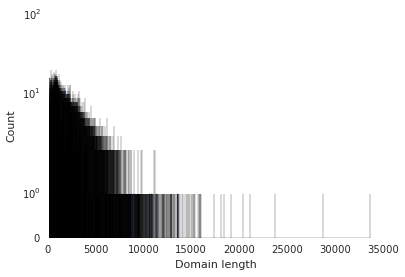

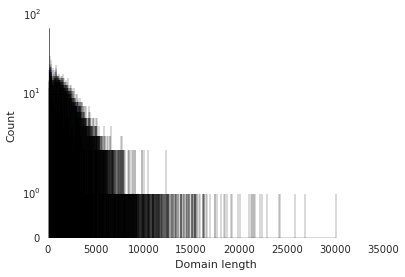

In [6]:
from matplotlib.backends.backend_pdf import PdfPages

pp = PdfPages("K562_H3K4me3_lengths.pdf")
fig, ax = plt.subplots()
y = load_domain_lengths("../data/processed_peaks/K562/K562_H3K4me3_mods.csv")
plot_histogram(y)
plt.ylabel("Count")
plt.xlabel("Domain length")
pp.savefig(fig)
pp.close()

pp = PdfPages("K562_H3K27ac_lengths.pdf")
fig, ax = plt.subplots()
y = load_domain_lengths("../data/processed_peaks/K562/K562_H3K27ac_mods.csv")
plot_histogram(y)
plt.ylabel("Count")
plt.xlabel("Domain length")
pp.savefig(fig)
pp.close()